In [1]:
import sys
import csv
from sklearn import tree
from sklearn import preprocessing
import matplotlib
import graphviz
import numpy

In [2]:
szDatasetPath = 'breast_cancer.csv'

'''
Read the data from the csv file
listColNames[j] stores the jth column name
listData[i][:-1] are the features of the ith example
listData[i][-1] is the target value of the ith example
'''
listColNames = [] # The list of column names
listData = [] # The list of feature vectors of all the examples
nRow = 0
with open(szDatasetPath) as csvFile:
    csvReader = csv.reader(csvFile, delimiter=',')
    for row in csvReader:
        if 0 == nRow:
            listColNames = row
        else:
            listData.append(row)
        nRow += 1

'''
Scan the data and store the unique values of each column.
listColUniqueVals[j] stores a list of unique values of the jth column
'''
listColUniqueVals = [[] for i in range(len(listColNames))]
for example in listData:
    for i in range(len(example)):
        if example[i] not in listColUniqueVals[i]:
            listColUniqueVals[i].append(example[i])


In [3]:
listColNames

['age',
 'menopause',
 'tumor-size',
 'inv-nodes',
 'node-caps',
 'deg-malig',
 'breast',
 'breast-quad',
 'irradiat',
 'class']

In [4]:
listColUniqueVals

[['30-39', '40-49', '60-69', '50-59', '70-79', '20-29'],
 ['premeno', 'ge40', 'lt40'],
 ['30-34',
  '20-24',
  '15-19',
  '0-4',
  '25-29',
  '50-54',
  '14-Oct',
  '40-44',
  '35-39',
  '9-May',
  '45-49'],
 ['0-2', '8-Jun', '11-Sep', '5-Mar', '15-17', '14-Dec', '24-26'],
 ['no', 'yes', '?'],
 ['3', '2', '1'],
 ['left', 'right'],
 ['left_low', 'right_up', 'left_up', 'right_low', 'central', '?'],
 ['no', 'yes'],
 ['no-recurrence-events', 'recurrence-events']]

In [5]:
listData

[['30-39',
  'premeno',
  '30-34',
  '0-2',
  'no',
  '3',
  'left',
  'left_low',
  'no',
  'no-recurrence-events'],
 ['40-49',
  'premeno',
  '20-24',
  '0-2',
  'no',
  '2',
  'right',
  'right_up',
  'no',
  'no-recurrence-events'],
 ['40-49',
  'premeno',
  '20-24',
  '0-2',
  'no',
  '2',
  'left',
  'left_low',
  'no',
  'no-recurrence-events'],
 ['60-69',
  'ge40',
  '15-19',
  '0-2',
  'no',
  '2',
  'right',
  'left_up',
  'no',
  'no-recurrence-events'],
 ['40-49',
  'premeno',
  '0-4',
  '0-2',
  'no',
  '2',
  'right',
  'right_low',
  'no',
  'no-recurrence-events'],
 ['60-69',
  'ge40',
  '15-19',
  '0-2',
  'no',
  '2',
  'left',
  'left_low',
  'no',
  'no-recurrence-events'],
 ['50-59',
  'premeno',
  '25-29',
  '0-2',
  'no',
  '2',
  'left',
  'left_low',
  'no',
  'no-recurrence-events'],
 ['60-69',
  'ge40',
  '20-24',
  '0-2',
  'no',
  '1',
  'left',
  'left_low',
  'no',
  'no-recurrence-events'],
 ['40-49',
  'premeno',
  '50-54',
  '0-2',
  'no',
  '2',
  'le

In [6]:
testAgeData = []
ageX = []
ageY = []
for element in listData:
    testAgeData.append([element[0],element[-1]])
    ageX.append(element[0])
    ageY.append(element[-1])

In [7]:
testAgeData

[['30-39', 'no-recurrence-events'],
 ['40-49', 'no-recurrence-events'],
 ['40-49', 'no-recurrence-events'],
 ['60-69', 'no-recurrence-events'],
 ['40-49', 'no-recurrence-events'],
 ['60-69', 'no-recurrence-events'],
 ['50-59', 'no-recurrence-events'],
 ['60-69', 'no-recurrence-events'],
 ['40-49', 'no-recurrence-events'],
 ['40-49', 'no-recurrence-events'],
 ['40-49', 'no-recurrence-events'],
 ['50-59', 'no-recurrence-events'],
 ['60-69', 'no-recurrence-events'],
 ['50-59', 'no-recurrence-events'],
 ['40-49', 'no-recurrence-events'],
 ['60-69', 'no-recurrence-events'],
 ['40-49', 'no-recurrence-events'],
 ['50-59', 'no-recurrence-events'],
 ['60-69', 'no-recurrence-events'],
 ['50-59', 'no-recurrence-events'],
 ['50-59', 'no-recurrence-events'],
 ['60-69', 'no-recurrence-events'],
 ['30-39', 'no-recurrence-events'],
 ['50-59', 'no-recurrence-events'],
 ['50-59', 'no-recurrence-events'],
 ['40-49', 'no-recurrence-events'],
 ['50-59', 'no-recurrence-events'],
 ['60-69', 'no-recurrence-ev

In [8]:
clf = tree.DecisionTreeClassifier(max_depth=1, presort=True)
le = preprocessing.LabelEncoder()
le.fit(ageY)
ageY = le.transform(ageY)
ageY

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [9]:
for i, word in enumerate(ageX):
    if word=='20-29':
        ageX[i]=0
    if word=='30-39':
        ageX[i]=1
    if word=='40-49':
        ageX[i]=2
    if word=='50-59':
        ageX[i]=3
    if word=='60-69':
        ageX[i]=4
    if word=='70-79':
        ageX[i]=5

In [10]:
ageX = numpy.array(ageX)

In [11]:
clf.fit(ageX.reshape(-1,1),ageY)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=True,
                       random_state=None, splitter='best')

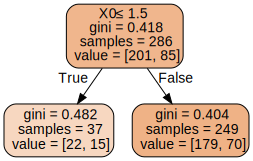

In [12]:
dot_data = tree.export_graphviz(clf, out_file=None,   
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data) 
graph